In [4]:
bsap = SeqIO.read("bspA_h37rv_protein.fa", "fasta")

In [5]:
bsap[60:70]

SeqRecord(seq=Seq('WARCSRHGQV'), id='Mycobacterium', name='Mycobacterium', description='Mycobacterium tuberculosis H37Rv|Rv1590|Rv1590', dbxrefs=[])

In [6]:
merged_tree = Phylo.read('motif/merged_biob_seqs_subset200_protein_consensus.nwk', 'newick')

In [7]:
merged_tree

Tree(rooted=False, weight=1.0)

In [8]:
Phylo.write(merged_tree, "motif/test_write.nwk", "newick")

1

In [9]:
# Phylo.draw(merged_tree)

In [1]:
from ete3 import Tree, PhyloTree, TreeStyle, NodeStyle, faces, AttrFace, CircleFace, TextFace, add_face_to_node, SeqMotifFace
from ete3 import NCBITaxa

import pandas as pd
import numpy as np
import os

from Bio import SeqIO
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord
from Bio import Phylo


In [2]:
def read_fasta(fasta_path):
    
    fasta_entries = []

    with open(fasta_path) as handle:
        for record in SeqIO.parse(handle, "fasta"):
            fasta_entries.append([record.id, record.seq])

    fasta_df = pd.DataFrame(data=fasta_entries, columns=['id', 'seq'])
    
    return fasta_df



def write_fasta(seqrecord_list, fasta_path):

    with open(fasta_path, "w") as output_handle:
        SeqIO.write(seqrecord_list, output_handle, "fasta")
        
    return
        

### setup genus names dataframe for running treemmer:

In [330]:
genomes = pd.read_csv("motif/actinomycetota_bvbrc_reference_genomes.csv")
genomes = genome_map[['Genome Name', 'NCBI Taxon ID', 'Genome ID', 'Order', 'Family', 'Genus']]

In [331]:
genomes['name'] = genomes['Genome Name'].str.replace(" ", "_")

In [332]:
genomes[['name', 'Family']].to_csv("treemmer/biob_family_lm.csv", index=None)

## generate fasta subsets based on treemer lists

In [81]:
sp_list = pd.read_csv("motif/putative2_biob_dependent_seqs_consensus_tree.nwk_trimmed_list_X_100", names=['id'])
df = read_fasta("motif/putative2_biob_dependent_seqs_aa.fasta")

df = sp_list.merge(df, how='left', left_on='id', right_on='id')
df = df.dropna()

In [102]:
df.head()

,id,seq
0,Actinomadura_madurae_strain_NCTC11373,"(M, D, L, L, D, T, L, V, D, K, G, L, R, R, E, ..."
1,Nocardia_sp._YIM_PH_21724,"(M, G, N, D, L, L, N, V, L, V, D, K, A, F, R, ..."
2,Kribbella_jejuensis_strain_DSM_17305,"(M, E, G, R, W, E, L, T, P, E, R, C, L, R, I, ..."
3,Nocardia_sp._ET3-3,"(M, F, K, L, E, V, D, C, E, R, M, T, S, E, L, ..."
4,Mycobacterium_haemophilum_DSM_44634_ATCC_29548,"(M, I, D, K, I, F, D, E, L, L, S, A, I, T, T, ..."


In [101]:
seqs = []

for i in df.index:
    seqs.append(SeqRecord(df.loc[i, 'seq'], id=df.loc[i, 'id'], description=""))


write_fasta(seqs, "motif/biob_dependent_subset100_protein.fa")

In [103]:
sp_list = pd.read_csv("motif/putative2_biob_independent_seqs_consensus_tree.nwk_trimmed_list_X_100", names=['id'])
df = read_fasta("motif/putative2_biob_independent_seqs_aa.fasta")

df = sp_list.merge(df, how='left', left_on='id', right_on='id')
df = df.dropna()

In [105]:
df.head()

,id,seq
0,Ornithinimicrobium_tianjinense_strain_CGMCC_1....,"(M, T, A, T, D, A, S, S, D, V, R, P, A, V, V, ..."
1,Sphaerimonospora_thailandensis_strain_NBRC_107569,"(M, I, S, L, E, A, L, A, E, K, A, I, R, L, E, ..."
2,Conexibacter_sp._Seoho-28,"(M, P, P, L, I, T, R, E, E, A, L, Q, L, G, E, ..."
3,Conexibacter_arvalis_strain_DSM_23288,"(M, P, P, L, I, T, R, E, E, A, H, R, L, G, E, ..."
4,Nitriliruptor_alkaliphilus_DSM_45188,"(M, S, A, P, E, H, P, V, A, P, P, T, A, D, A, ..."


In [106]:
seqs = []

for i in df.index:
    seqs.append(SeqRecord(df.loc[i, 'seq'], id=df.loc[i, 'id'], description=""))


write_fasta(seqs, "motif/biob_independent_subset100_protein.fa")

## Setting up tree for bsap nt newick tree:

In [32]:
# ncbi = NCBITaxa()
# ncbi.update_taxonomy_database()

In [3]:
df = pd.read_csv("final_nt_workflow/subset100_feature_coords.csv")


In [5]:
# rooted:
# newick_file = "final_nt_workflow/bsap_nt_subset50_consensus_tree.nwk.rooted"
# newick_file = "final_nt_workflow/bsap_nt_subset48_consensus_tree.nwk.rooted"
# newick_file = "final_nt_workflow/bsap_nt_subset47_consensus_tree.nwk.rooted"
newick_file = "final_nt_workflow/bsap_nt_sequences_subset41_consensus_tree.nwk.rooted"

with open(newick_file) as f:
    nwk = f.readline().strip('\n')

# # unrooted:
# newick_file = "final_nt_workflow/bsap_nt_subset50_consensus_tree.nwk"

# with open(newick_file) as f:
#     nwk_unrooted = f.readline().strip('\n')



In [7]:
# msa_fasta = "final_nt_workflow/bsap_nt_sequences_subset50.mfa"
# msa_fasta = "final_nt_workflow/bsap_nt_sequences_subset47.mfa"
# msa_fasta = "final_nt_workflow/bsap_protein_sequences_subset47_edit.mfa"
msa_fasta = "final_nt_workflow/bsap_nt_sequences_subset41.msa"
msa = []

with open(msa_fasta) as handle:
    for record in SeqIO.parse(handle, "fasta"):
#         msa.append(SeqRecord(Seq(record.seq), id=record.id, name=record.id.replace("_", " ")))
        msa.append([record.id, record.id.replace("_", " "), Seq(record.seq)])

msa = pd.DataFrame(data=msa)

In [8]:
msa['genus'] = msa[1].str.split(" ", expand=True)[0]

In [9]:
genus_taxid_list = """
1663
1988
1854
2005
1716
697025
85043
1827
1661425
2060
741759
583360
2071
182639
1813
695999
39845
1847
35750
2000
2979332
2053
79255
1866885
1817
1763
1073531"""

In [10]:
genus_taxid_list.replace("\n", ",")

',1663,1988,1854,2005,1716,697025,85043,1827,1661425,2060,741759,583360,2071,182639,1813,695999,39845,1847,35750,2000,2979332,2053,79255,1866885,1817,1763,1073531'

In [11]:
for i in msa['genus'].unique().tolist():
    print(i)

Corynebacterium
Hoyosella
Amycolatopsis
Umezawaea
Tsukamurella
Actinophytocola
Saccharothrix
Actinokineospora
Pseudonocardia
Williamsia
Rhodococcus
Prescottella
Mycolicibacter
Tomitella
Kribbella
Mycobacterium
Mycolicibacterium
Gordonia
Nocardia


In [12]:
colors = {'Prescottella': "DodgerBlue",
 'Williamsia': "DodgerBlue",
 'Rhodococcus': "DodgerBlue",
 'Nocardia': "DodgerBlue",
 
 'Mycolicibacterium': "MediumVioletRed",
 'Mycobacterium': "MediumVioletRed",
 'Mycolicibacter': "MediumVioletRed",

 'Streptosporangium': "Indigo",
 'Microbispora': "Indigo",

 'Gordonia': "DarkGreen",

 'Pseudonocardia': "MediumBlue",
 'Umezawaea': "MediumBlue",
 'Actinophytocola': "MediumBlue",
 'Saccharothrix': "MediumBlue",
 'Amycolatopsis': "MediumBlue",
 'Actinokineospora': "MediumBlue",

 'Tsukamurella': "Sienna",

 'Corynebacterium': "FireBrick",
 'Tomitella': "FireBrick",

 'Hoyosella': "DimGray",

 'Actinomadura': "Black",

 'Sporichthya': "LimeGreen",


 'Frankia': "Red",

 'Kribbella': "OrangeRed",

 'Arthrobacter': "DarkMagenta"}

In [13]:
msa.head()

,0,1,2,genus
0,Corynebacterium_phoceense,Corynebacterium phoceense,"(-, -, -, -, -, -, -, -, -, -, -, -, -, -, -, ...",Corynebacterium
1,Corynebacterium_silvaticum,Corynebacterium silvaticum,"(-, -, -, -, -, -, -, -, -, -, -, -, -, -, -, ...",Corynebacterium
2,Corynebacterium_gallinarum,Corynebacterium gallinarum,"(-, -, -, -, -, -, -, -, -, -, -, -, -, -, -, ...",Corynebacterium
3,Corynebacterium_argentoratense_DSM_44202,Corynebacterium argentoratense DSM 44202,"(-, -, -, -, -, -, -, -, -, -, -, -, -, -, -, ...",Corynebacterium
4,Corynebacterium_aquilae_DSM_44791,Corynebacterium aquilae DSM 44791,"(-, -, -, -, -, -, -, -, -, -, -, -, -, -, -, ...",Corynebacterium


In [14]:
sp_list = pd.Series(nwk.split(",")).str.rstrip("\n"
    ).str.replace("_", " ").str.replace("(", " ").str.replace(")", " ").str.split(":", expand=True)[0].str.strip().tolist()


In [15]:
pd.DataFrame(sp_list).to_csv("final_nt_workflow/bsap_nt_subset41_species.csv", index=False)

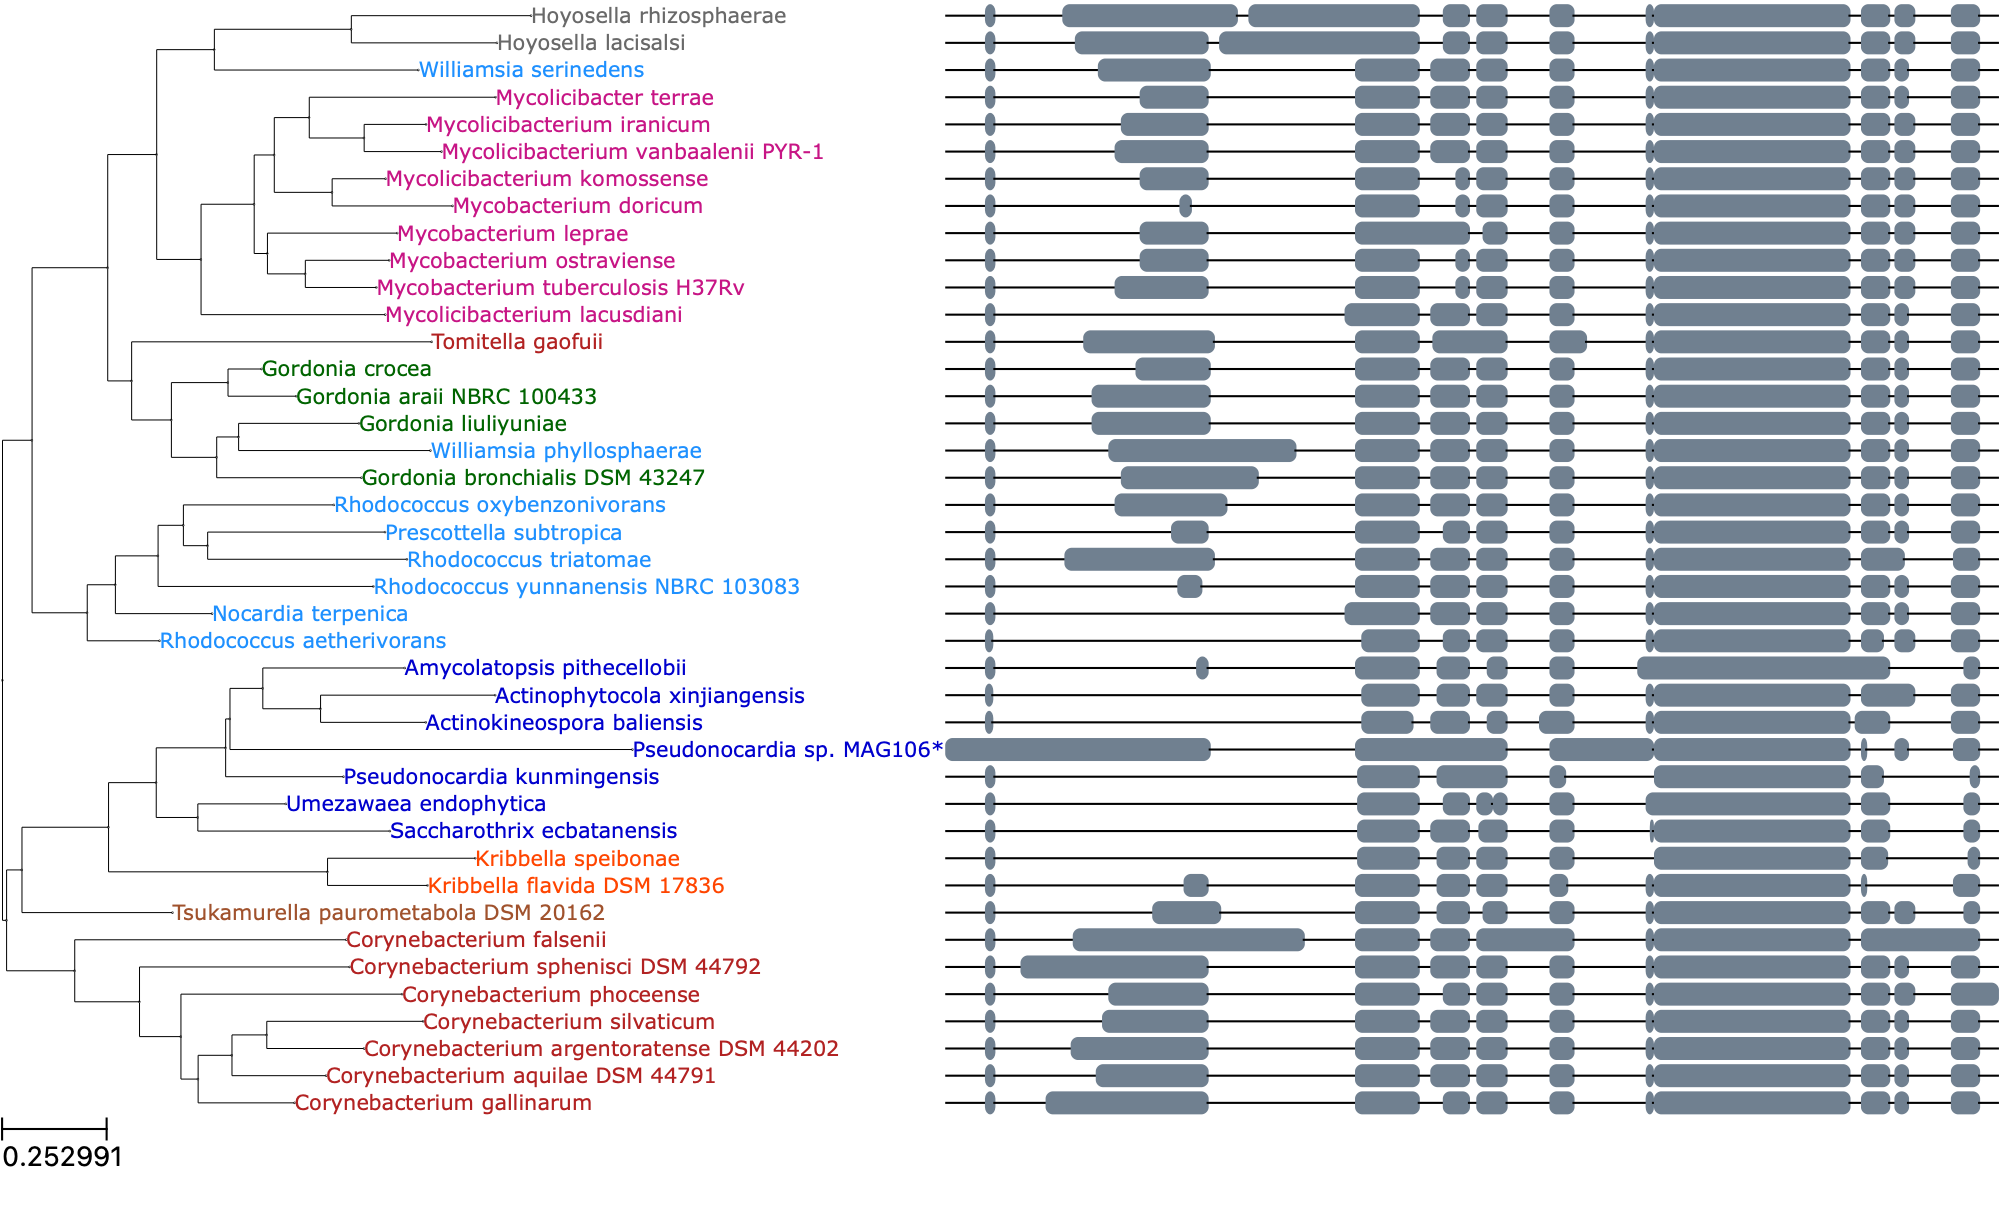

In [16]:
def get_tree(nwk, msa):
    nwk = nwk.replace("_", " ")
    t = Tree(nwk)
    
    for l in t.iter_leaves():        
        # create new label:
        N=AttrFace("name", fgcolor=colors[l.name.split(" ")[0]])
#         N=AttrFace("name")

        # labels aligned to the same level:
#         l.add_face(N, -1, position="aligned")
        l.add_face(N, 1)
    
    for i in msa.index:
#         print(i)
#         seqFace = SeqMotifFace(seq)
        seqFace = SeqMotifFace((str(msa.loc[i, 2])), seq_format="()", width=100)
#         seqFace = SeqMotifFace((str(msa.loc[i, 2])), seq_format="compactseq")
#         seqFace = SeqMotifFace((str(msa.loc[i, 2])), seq_format="seq")
        (t & msa.loc[i, 1]).add_face(seqFace, 0, "aligned")
        
    return t


t = get_tree(nwk, msa)
ts = TreeStyle()
ts.tree_width = 300
ts.show_leaf_name = False

# ts.legend.add_face(TextFace(str(consensus.seq), fsize=6), column=0)

# ts.show_branch_support = True

# Draws nodes as small red spheres of diameter equal to 10 pixels
nstyle = NodeStyle()
nstyle["size"] = 0.2
nstyle["fgcolor"] = "black"

# Applies the same static style to all nodes in the tree. Note that,
# if "nstyle" is modified, changes will affect to all nodes
for n in t.traverse():
    n.set_style(nstyle)
    

t.render("%%inline", tree_style=ts, w=2000)  




In [400]:
# consensus = SeqIO.read('final_nt_workflow/bsap_protein_sequences_subset47_EMBOSS_consensus.fa', 'fasta')
consensus = SeqIO.read("final_nt_workflow/bsap_nt_subset47_consensus0.fa", "fasta")

In [403]:
consensus.seq = consensus.seq.upper().replace("N", "-")
# consensus.seq = consensus.seq.upper().replace("X", "-")

In [404]:
str(consensus.seq)

'----------------------------------GTG-------------------------------------------------------------------C-GC------------------------G--C----------------------CGG--------------T-C-AC--C--CACCGG---------------------------------------------------------------------------G--G--G--GC--T-CCG-C-GC------GC-CG-----GCT-G---------G-C--TGGAGCCGCCGCGGTTCTGCGCGCAGTGCGG-CGCCGGATGGTCGTGCAGGTC-G-CCGGACGGCTGGTGGGC-CGGTGCTC-CGGCACGG-G----G-T-GACTC----------------------------CT---GG-----CG-TGA---------'

## biob merged tree

In [3]:

def get_tree_files(newick_path, msa_path):

    with open(newick_path) as f:
        nwk = f.readline().strip('\n')


    msa = []

    with open(msa_path) as handle:
        for record in SeqIO.parse(handle, "fasta"):
            msa.append([record.id, record.id.replace("_", " "), Seq(record.seq)])

    msa = pd.DataFrame(data=msa)
    
    return nwk, msa



def get_tree(nwk, msa):
    nwk = nwk.replace("_", " ")
    t = Tree(nwk)
    
    for l in t.iter_leaves():        
        # create new label:
        N=AttrFace("name", fgcolor=color_dict[l.name])
        N.hz_align = 2
#         N=AttrFace("name")

        # labels aligned to the same level:
        l.add_face(N, 0, position="aligned")
#         l.add_face(N, 1, position="branch-right")

#     for i in msa.index:
# #         print(i)
# #         seqFace = SeqMotifFace(seq)
#         seqFace = SeqMotifFace((str(msa.loc[i, 2])), seq_format="()")
# #         seqFace = SeqMotifFace((str(msa.loc[i, 2])), seq_format="seq")

#         (t & msa.loc[i, 1]).add_face(seqFace, 0, "aligned")
        
    return t



def generate_biob_labeled_tree(nwk, msa):

    t = get_tree(nwk, msa)
    ts = TreeStyle()
    ts.tree_width = 1200
    ts.show_leaf_name = False
    ts.draw_guiding_lines = True

    # ts.show_branch_support = True

    # Draws nodes as small red spheres of diameter equal to 10 pixels
    nstyle = NodeStyle()
    nstyle["size"] = 0.2
    nstyle["fgcolor"] = "black"

    # Applies the same static style to all nodes in the tree. Note that,
    # if "nstyle" is modified, changes will affect to all nodes
    for n in t.traverse():
        n.set_style(nstyle)
        
    return t, ts
    


In [4]:
# df = pd.read_csv("motif/merged_biob_msa_annotation.csv")
# df = pd.read_csv("motif/biob_merged_subset200_annotation.csv")
# df = pd.read_csv("motif/biob_merged_subset200_annotation_editComplete.csv")
# df = pd.read_csv("motif/biob_merged_subset200_annotation_filter3.csv")
df = pd.read_csv("motif/bacteria_subset300_type.csv")

In [7]:
df['Genome Name'] = df['id'].str.replace("_", " ")

In [8]:
# set up dependent vs independent color dict:
df['color'] = df['type'].apply(lambda x: 'darkblue' if x == 'dep' else 'darkred')
# color_dict = dict(zip(df['name'], df['color']))
color_dict = dict(zip(df['Genome Name'], df['color']))

### rooted:

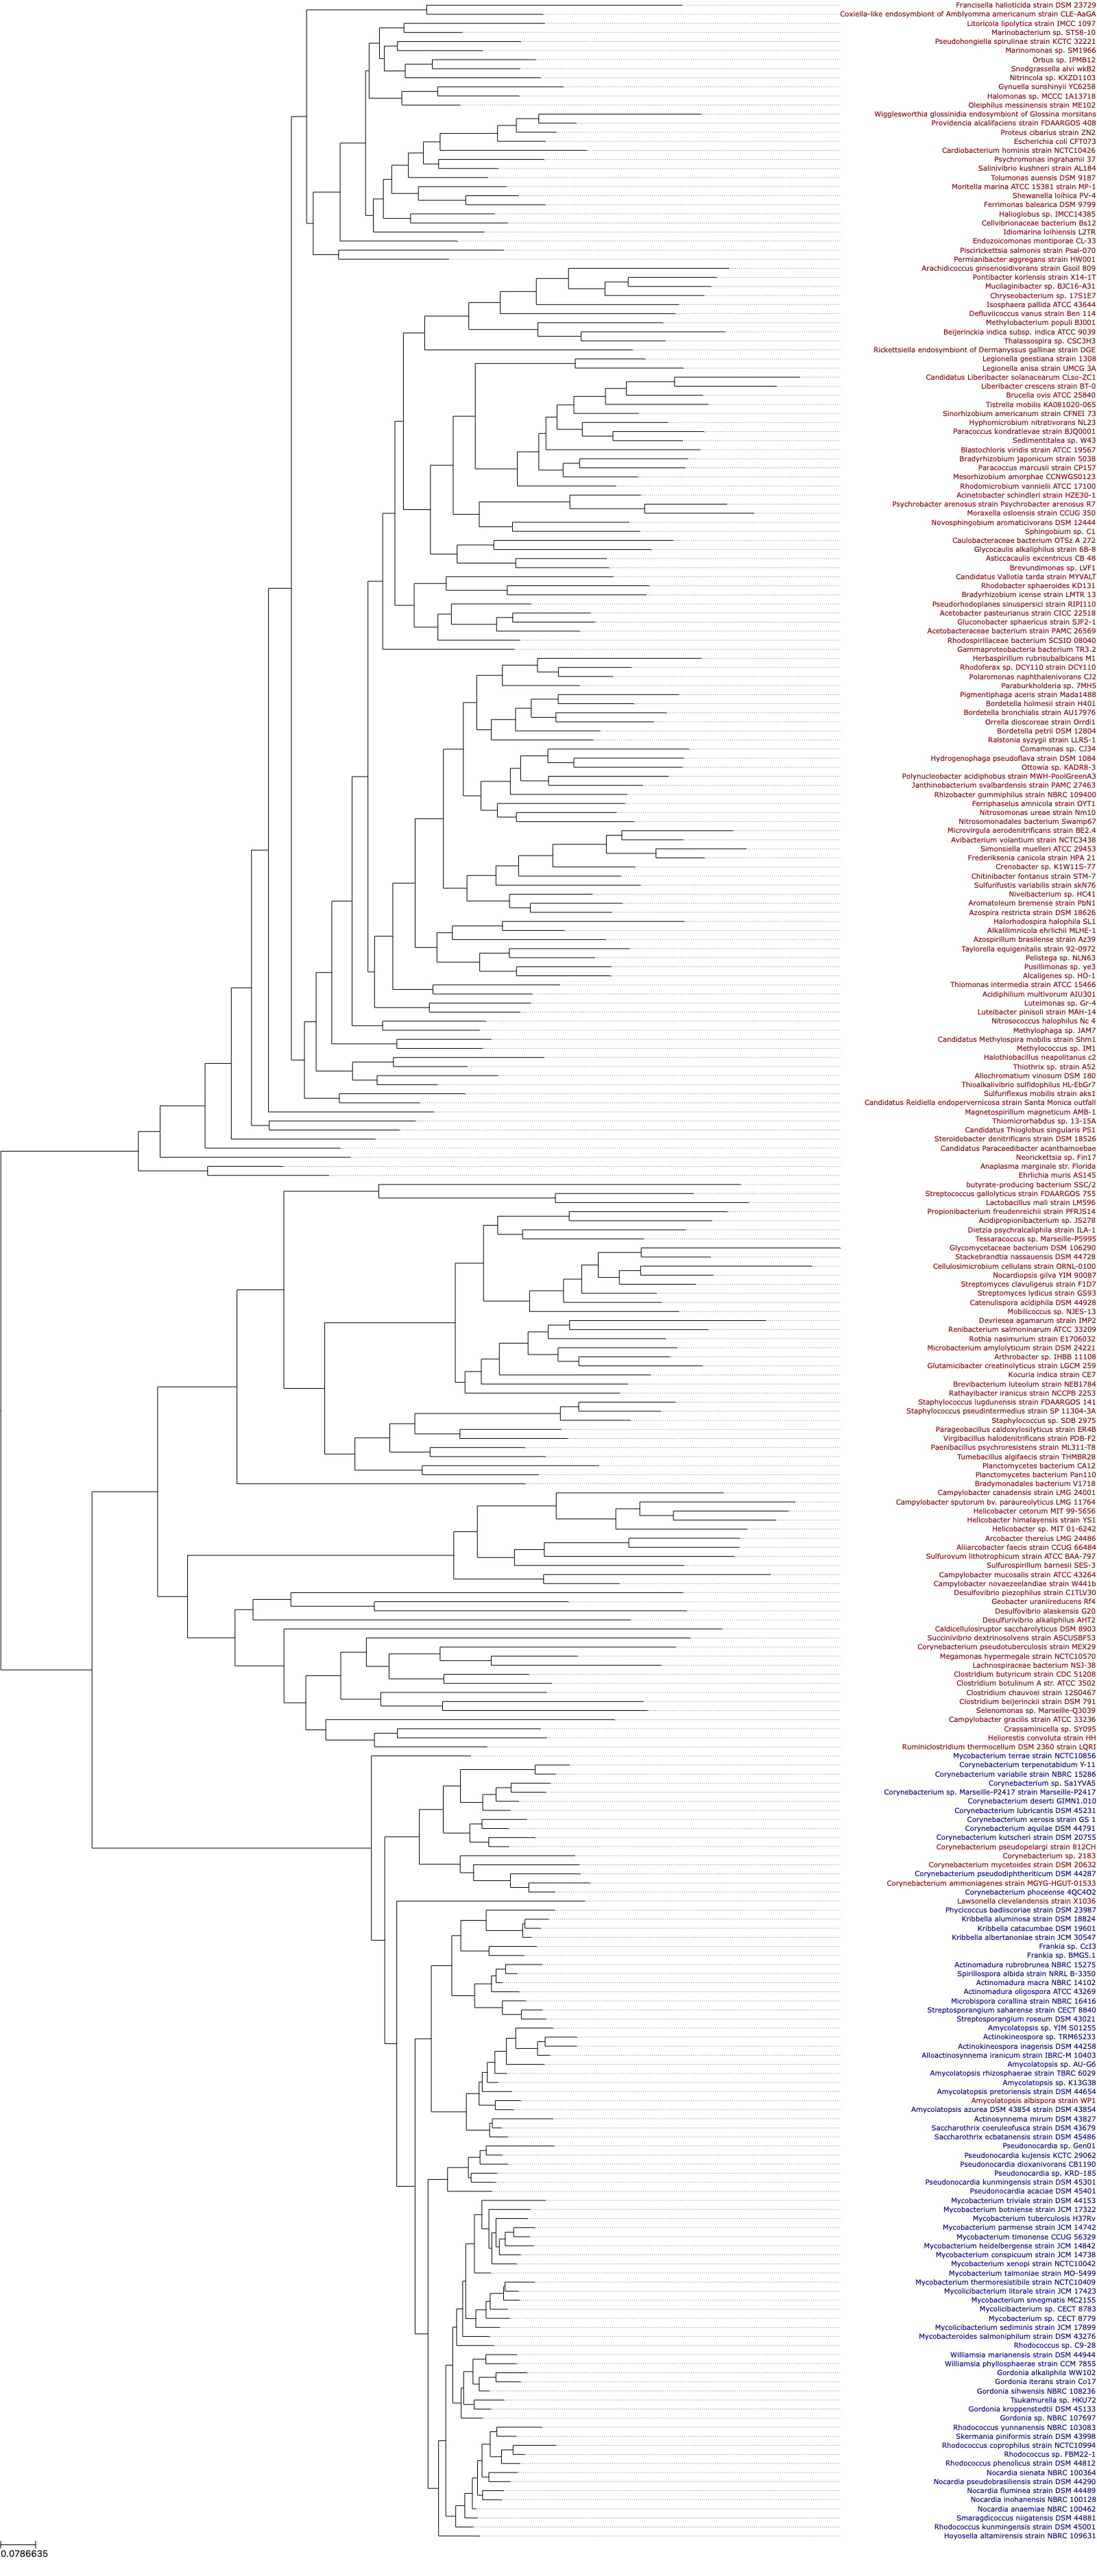

In [10]:

# rooted:
# newick_file = "motif/merged_biob_seqs_subset200_protein_consensus.nwk"
# newick_file = "motif/merged_biob_seqs_subset200_protein_consensus.nwk.rooted"

# newick_file = "motif/merged_biob_seqs_subset200_protein_pruned2_consensus.nwk.rooted"
# msa_fasta = "motif/merged_biob_seqs_subset200_protein_pruned2.mfa"

# newick_file = "motif/biob_merged_subset200_consensus_tree.nwk.rooted"
# msa_fasta = "motif/biob_merged_subset200.msa"

# newick_file = "motif/biob_merged_subset200_pruned_consensus_tree.nwk.rooted"
# msa_fasta = "motif/biob_merged_subset200_pruned.msa"

# newick_file = "motif/biob_merged_subset200_editComplete_pruned_consensus_tree.nwk.rooted3"
# msa_fasta = "motif/biob_merged_subset200_editComplete_pruned.msa"

# newick_file = "motif/biob_merged_subset200_filter3_pruned2_consensus_tree.nwk.rooted1"
# msa_fasta = "motif/biob_merged_subset200_filter3_pruned2.msa"

newick_file = "motif/bacteria_subset300FIX_biob_aa.msa.contree.rooted"
msa_fasta = "motif/bacteria_subset300FIX_biob_aa.msa"


nwk, msa = get_tree_files(newick_file, msa_fasta)
t, ts = generate_biob_labeled_tree(nwk, msa)

t.render("%%inline", tree_style=ts, w=1600)

## Feature viewer exploration:

In [315]:
h37rv_biob = SeqIO.read("bspA_h37rv.fa", "fasta")

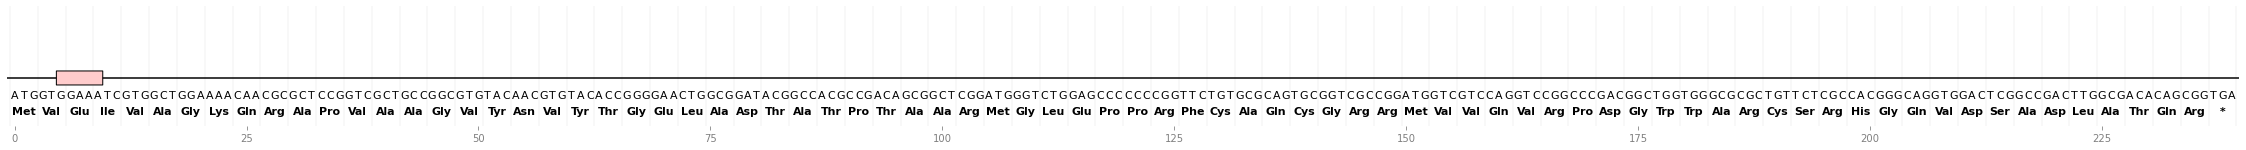

In [321]:
from dna_features_viewer import GraphicFeature, GraphicRecord

sequence = str(h37rv_biob.seq)
record = GraphicRecord(sequence=sequence, features=[
    GraphicFeature(start=5, end=10, strand=0, color='#ffcccc'),
#     GraphicFeature(start=8, end=15, strand=+1, color='#ccccff')
])

ax, _ = record.plot(figure_width=40)
record.plot_sequence(ax)
record.plot_translation(ax, (0, len(sequence)), fontdict={'weight': 'bold'})

# ax.figure.savefig('sequence_and_translation.png', bbox_inches='tight')



In [438]:
len("---------------------------")//3

9

In [439]:
con = "---------------------------------GTG-------------------------------------------------------------------C-GCG--------------------------C---------------------CGG---------------T-C-AC--C--CACCGG----------------------------------------------------------------------------G--G--G--GC--T-CCG-C-GC-------GC-CGG---CT-GG----------CTGGAGCCGCCGCGGTTCTGCGCGCAGTGCGG-CGCCGGATGGTCGTGCAGGTC-G-CCGGACGGCTGGTGGGC-CGGTGCTC-CGGCACGG-G----G-T-GACTC----------------------------CT---GG-----CG-TGA---------"

In [444]:
str(Seq(con.replace("-", "N")).translate(table=10)).replace("X", "-")

'-----------V-----------------------A----------------R---------TG----------------------------A-P-A--AR-LG---LEPPRFCAQCGRRMVVQV-PDGWWARCSRHG---DS---------L---RC---'

In [ ]:
from dna_features_viewer import GraphicFeature, GraphicRecord

con = "---------------------------------GTG-------------------------------------------------------------------C-GCG--------------------------C---------------------CGG---------------T-C-AC--C--CACCGG----------------------------------------------------------------------------G--G--G--GC--T-CCG-C-GC-------GC-CGG---CT-GG----------CTGGAGCCGCCGCGGTTCTGCGCGCAGTGCGG-CGCCGGATGGTCGTGCAGGTC-G-CCGGACGGCTGGTGGGC-CGGTGCTC-CGGCACGG-G----G-T-GACTC----------------------------CT---GG-----CG-TGA---------"
record = GraphicRecord(sequence=sequence, features=[
    GraphicFeature(start=5, end=10, strand=0, color='#ffcccc'),
#     GraphicFeature(start=8, end=15, strand=+1, color='#ccccff')
])

ax, _ = record.plot(figure_width=40)
record.plot_sequence(ax)
record.plot_translation(ax, (0, len(sequence)), fontdict={'weight': 'bold'})

# ax.figure.savefig('sequence_and_translation.png', bbox_inches='tight')



In [411]:
mtb = "----------------------------------(ATG)(GTG)(G---------------------------------------AA)(ATC)(GTG)(GCT)(GGA)(AAA)(CAA)(CGC)(GCT)(CC------------------------G)(GTC)(GCT)(GC-----------------C)(GG----------C)(GTG)(TAC)(AAC)(GTG)(TAC)(ACC)(GGG)--------------------------------------------------------------------(GAA)(CTG)(GCG)(GAT)(ACG)(GCC)(ACG)(CCG)(ACA)(GCG)-----(GCT)(CG-----G)(ATG)(G---------GT)(C--TG)(GAG)(CCC)(CCC)(CGG)(TTC)(TGT)(GCG)(CAG)(TGC)(GGT)(CGC)(CGG)(ATG)(GTC)(GTC)(CAG)(GTC)(CGG)(CCC)(GAC)(GGC)(TGG)(TGG)(GCG)(CGC)(TGT)(TCT)(CGC)(CAC)(GGG)(C---AG)(GTG)(GAC)(TCG)(G---------------------CC)(GAC)(TTG)(GCG)(ACA)(CAG)(CGG)(TGA)---------"
      "----------------------------------(ATG)GTGG---------------------------------------AAATCGTGGCTGGAAAACAACGCGCT(CC------------------------G)GTCGCTGC-----------------(CGG)----------CGTG(TAC)(AAC)GTGTAC(ACC)(GGG)--------------------------------------------------------------------GAACTGGCGGATACG(GCC)ACG(CCG)ACA(GCG)-----(GCT)(CG-----G)(ATG)(G---------GT)(C--TG)(GAG)(CCC)(CCC)(CGG)(TTC)(TGT)(GCG)(CAG)(TGC)(GGT)(CGC)(CGG)(ATG)(GTC)(GTC)(CAG)(GTC)CGG(CCC)(GAC)(GGC)(TGG)(TGG)(GCG)(CGC)(TGT)(TCT)(CGC)(CAC)(GGG)C---AGGTG(GAC)(TCG)G---------------------CCGAC(TTG)GCGACACAG(CGG)(TGA)---------"
con = "----------------------------------(GTG)-------------------------------------------------------------------C-(GC------------------------G)--C----------------------(CGG)--------------(T-C)(-AC)--C--C(ACC)(GG-)--------------------------------------------------------------------------G--G--G--(GC-)-T-(CCG)-C-(GC-)-----(GC-)(CG-----G)(CT-)(G---------G-)(C--TG)(GAG)(CCG)(CCG)(CGG)(TTC)(TGC)(GCG)(CAG)(TGC)(GG-)(CGC)(CGG)(ATG)(GTC)(GTG)(CAG)(GTC)-G-(CCG)(GAC)(GGC)(TGG)(TGG)(GC-)(CGG)(TGC)(TC-)(CGG)(CAC)(GG-)G----G-T-(GAC)(TC-)---------------------------(CT-)--GG-----(CG-)(TGA)---------"
                                "-----------V"

In [421]:
Seq("CCG").translate()

Seq('P')

In [433]:
Seq("GTG").translate(table=10)

Seq('V')

In [413]:
con

'----------------------------------GTG-------------------------------------------------------------------C-GC------------------------G--C----------------------CGG--------------T-C-AC--C--CACCGG---------------------------------------------------------------------------G--G--G--GC--T-CCG-C-GC------GC-CG-----GCT-G---------G-C--TGGAGCCGCCGCGGTTCTGCGCGCAGTGCGG-CGCCGGATGGTCGTGCAGGTC-G-CCGGACGGCTGGTGGGC-CGGTGCTC-CGGCACGG-G----G-T-GACTC----------------------------CT---GG-----CG-TGA---------'

In [220]:
nt = Seq("atggtggaaatcgtggctggaaaacaacgcgctccggtcgctgccggcgtgtacaacgtgtacaccggggaactggcggatacggccacgccgacagcggctcggatgggtctggagcccccccggttctgtgcgcagtgcggtcgccggatggtcgtccaggtccggcccgacggctggtgggcgcgctgttctcgccacgggcaggtggactcggccgacttggcgacacagcggtga")
aa = Seq("MVEIVAGKQRAPVAAGVYNVYTGELADTATPTAARMGLEPPRFCAQCGRRMVVQVRPDGWWARCSRHGQVDSADLATQR")

In [234]:

aa[43:47]

aa[62:66]

Seq('RCSR')

In [239]:
nt[186:198]

Seq('cgctgttctcgc')

In [242]:
nt.find('gcgctgttc')

185

In [216]:
Seq('') in aa

True

In [244]:
Seq('tgt').translate()

Seq('C')

In [5]:
df.head()

,sseqid,staxid,ssciname,bspa_pident,bspa_len,bspa_start,bspa_end,biob_pident,biob_len,biob_start,biob_end
0,gi|1016308414|ref|NZ_BDCG01000018.1|,1220553.0,Nocardia flavorosea NBRC 108225,79.592,98.0,212165.0,212262.0,79.855,968.0,211058.0,212024.0
1,gi|1033083881|ref|NZ_CP007220.1|,1460372.0,Mycobacteroides chelonae CCUG 47445,70.619,194.0,2659309.0,2659116.0,81.912,973.0,2660313.0,2659341.0
2,gi|1055243950|ref|NZ_BCRN01000023.1|,1219361.0,Millisia brevis NBRC 105863,74.561,114.0,1225.0,1338.0,81.167,908.0,227.0,1131.0
3,gi|1056159065|ref|NZ_BDBH01000007.1|,1210074.0,Nocardia harenae NBRC 108248,80.147,136.0,660102.0,660237.0,83.453,979.0,659020.0,659998.0
4,gi|1056192997|ref|NZ_BDBQ01000036.1|,1210084.0,Nocardia miyunensis NBRC 108239,77.778,108.0,43734.0,43841.0,80.081,989.0,42558.0,43546.0


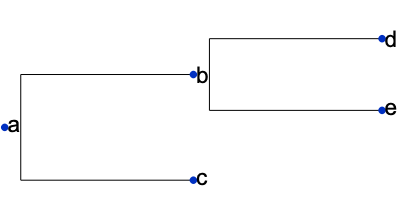

In [13]:
# Specify formatting of tree
ts = TreeStyle()

# Hide leaf labels and scale
ts.show_leaf_name = False
ts.show_scale=False

# Define layout function to label tree nodes
def my_layout(node):
        F = TextFace(node.name, tight_text=True, fsize=12, ftype="Arial")
        add_face_to_node(F, node, column=0, position="branch-right")

# Apply layout function
ts.layout_fn = my_layout

# Add margin between tree branches
ts.branch_vertical_margin = 30


# Create Tree instance
t = Tree("((d,e)b,c)a;", format=1)

# Render inline in notebook
t.render("%%inline", tree_style=ts, w=400)  



In [252]:
a = "atgcctgacccggctcacccaggagcggacggcgcaattgaggaacatgatgtggacacgttgaaccggacgcacgcgagccccagcgacgggacccgcaccgactggacccgcgaggaaatcgccgcgctgttcgacctgccgttcgacgagctgatgtggcaggcgcagggcgtccaccgcgcgcatcacgtggcggggcaggtgcaattgtgcacgctgctgtcgatcaagaccggcggctgcccggaggattgcggctattgctcgcaatccgtgcatgccgacagcggggtgaaggcgaccaagctgatggacgtgcgcgccgtgctgcaacgcgcggccgaggcacgcgatgcgggcagccagcggttctgcatgggtgcggcgtggcgcaatcccaaggaccgcgacatggacgcgatcgtcgcgatgatcgagggcgttcgcgcgatgggcatggaaacgtgcatgacgctgggcatgctgacgcccgaacaggcggagcggctgagccacgcggggctcgattattataaccacaatatcgacaccgcaccggagcgttatggcgaggtgatcaccacgcgcagcttcgacgagcggctcgacacgctggcgcatgtgcgcgacgccgggatcaacgtgtgctgcggcgggatcgtcgggatgggcgagacgcgcgccgatcgcgtcgggttcgtccatgcgctcgccacgctgccgcgccatccggaaagcgtgccggtcaacgcattggtgccggtaaggggcacggtgctgggtgacatgctggccgatacgccgctggcgaagatcgacgatatcgaattcgtccgtactgtcgccgtcgcgcgcatcaccatgccgcgcagcatggtgcgcctgtctgccgggcgcgaatcgatgagcgaggcgacccaggcgctgtgcttcatggccggcgccaattcgatcttcaccggcgacaagttgctgaccgcgggcaatcgcggcgacagcgccgacgcctcgctgttcgccaagctggggctgcagccgatggtggcggaggagccgatgcgg"

In [253]:
str(Seq(a).translate(table=11))

'MPDPAHPGADGAIEEHDVDTLNRTHASPSDGTRTDWTREEIAALFDLPFDELMWQAQGVHRAHHVAGQVQLCTLLSIKTGGCPEDCGYCSQSVHADSGVKATKLMDVRAVLQRAAEARDAGSQRFCMGAAWRNPKDRDMDAIVAMIEGVRAMGMETCMTLGMLTPEQAERLSHAGLDYYNHNIDTAPERYGEVITTRSFDERLDTLAHVRDAGINVCCGGIVGMGETRADRVGFVHALATLPRHPESVPVNALVPVRGTVLGDMLADTPLAKIDDIEFVRTVAVARITMPRSMVRLSAGRESMSEATQALCFMAGANSIFTGDKLLTAGNRGDSADASLFAKLGLQPMVAEEPMR'

In [ ]:
def get_example_tree():

    # Performs a tree reconciliation analysis
    gene_tree_nw = '((Dme_001,Dme_002),(((Cfa_001,Mms_001),((Hsa_001,Ptr_001),Mmu_001)),(Ptr_002,(Hsa_002,Mmu_002))));'
#     species_tree_nw = "((((Hsa, Ptr), Mmu), (Mms, Cfa)), Dme);"
    genetree = PhyloTree(gene_tree_nw)
#     sptree = PhyloTree(species_tree_nw)
    recon_tree, events = genetree.reconcile(sptree)
    recon_tree.link_to_alignment(alg)
    return recon_tree, TreeStyle()

if __name__ == "__main__":
    # Visualize the reconciled tree
    t, ts = get_example_tree()
    t.show(tree_style=ts)
    #recon_tree.render("phylotree.png", w=750)

In [7]:
# newick = (Arthrobacter_nitrophenolicus:0.8896878459,((((((((((Hoyosella_subflava_DQS3-9A1:0.3508663512,Hoyosella_lacisalsi:0.1894653351)95:0.2073979751,(((((Mycolicibacter_acidiphilus:0.4430333359,((((Corynebacterium_pacaense:0.3911112288,Tomitella_cavernea:0.2064839128)88:0.1032350779,Gordonia_crocea:0.0817644292)61:0.0690310392,Williamsia_muralis:0.2208275813)68:0.0339532750,Gordonia_alkaliphila:0.2287327119)45:0.0461357664)23:0.0091273577,(Rhodococcus_gordoniae:0.4451114705,(Mycolicibacterium_arabiense:0.3914517762,Williamsia_sterculiae:0.0062864857)50:0.0737835801)67:0.0668757322)38:0.0664177828,((Gordonia_polyisoprenivorans_VH2:0.2118060899,Williamsia_phyllosphaerae:0.1484510953)79:0.1154895348,Gordonia_rubripertincta:0.1201852672)91:0.1344803068)31:0.0712691868,(((((Actinomadura_decatromicini:0.1632801634,(Actinomadura_namibiensis:0.2495723171,(Kribbella_amoyensis:0.1651629385,((Kribbella_sindirgiensis:0.1811172753,Kribbella_turkmenica:0.1474101580)99:0.0595546754,Kribbella_jiaozuonensis:0.0627667104)100:0.3821097072)100:0.2607748964)96:0.0256605604)94:0.0946370046,((Actinomycetospora_soli:0.0337361026,CP002593.1:0.2781182230)84:0.4792473766,(((Saccharothrix_coeruleofusca:0.0841297771,Saccharothrix_carnea:0.5315723635)75:0.3603291178,Lentzea_flaviverrucosa:0.0189126952)39:0.0655214591,Lentzea_tibetensis:0.1915745780)40:0.0000022350)85:0.2468373093)84:0.0966420467,(Tsukamurella_pseudospumae:0.1923348132,Millisia_brevis_NBRC_105863:0.2744512152)57:0.0040743331)76:0.1255928010,(Nocardia_bovistercoris:0.1139618177,Nocardia_harenae_NBRC_108248:0.1998439440)37:0.0237600539)28:0.0552266916,(CP060131.1:9.9999983709,CP053564.1_6214800-6214895:9.9999982218)96:9.9999980256)28:0.0349589616)29:0.0000029624,Nocardia_takedensis_NBRC_100417:0.1451438377)41:0.0660475893)46:0.0248534859,Nocardia_albiluteola:0.2527258420)43:0.0631174239,(Nocardia_paucivorans_NBRC_100373:0.2711776222,(Rhodococcus_oxybenzonivorans:0.1972144447,Nocardia_higoensis_NBRC_100133:0.1026640170)82:0.0629421256)50:0.0349639399)61:0.0678987836,Mycobacteroides_abscessus:0.2875965161)61:0.1018967545,Mycolicibacterium_komossense:0.2051842195)58:0.0407535761,Mycobacterium_virginiense:0.1938729782)47:0.0271236759,Mycolicibacterium_xanthum:0.1420281742)43:0.0000026860,(Mycolicibacterium_celeriflavum:0.2683328756,Mycobacterium_palauense:0.1623266775)80:0.0693723488)54:0.0469130293,((Mycobacterium_leprae:0.2132515506,(Mycobacterium_numidiamassiliense:0.1964424305,(Mycobacterium_ulcerans:0.1521826245,Mycobacterium_tuberculosis_H37Rv:0.1465907652)89:0.0328538330)77:0.0451875401)80:0.0987013529,Mycolicibacterium_obuense:0.1403607808)48:0.0390900290)54:0.1538759073,Mycolicibacterium_smegmatis:0.0000020870);


newick = "(683150:0.6291973470,((((((((443218:0.3136120498,2742202:0.1496087981):0.1295159703,2842303:0.2759229500):0.0907773635,(((223392:0.3098333927,1286181:0.1913216254):0.1316800228,1112204:0.2055047922):0.0451037828,(36822:0.1467137108,885042:0.1435899492):0.0542241234):0.1223077346):0.0409380003,((1053547:0.2046947507,(85044:0.1853676219,589162:0.1289706243):0.0431712121):0.0695166807,1344003:0.0971247998):0.0935463215):0.0743789536,(((((((1848329:0.6954880962,2034511:0.1931884024):0.0000022149,(36809:0.3036416325,(1779:0.1994010038,2796469:0.1376103982):0.0781142667):0.0032417807):0.0677510283,1387982:0.2991369510):0.0000028598,(1816684:0.3910053092,((1206734:0.2677086828,1795032:0.0566507234):0.0606768730,(1206735:0.1168860200,(37331:9.9999988599,2736640:9.4941769171):7.4382009406):0.1638858070):0.0836463477):0.0000023627):0.0000028852,1769:0.1973772207):0.0561959253,(1809:0.1191301513,83332:0.1509274766):0.0446142630):0.0125251317,1841861:0.1989225116):0.0970319995):0.0000025212,1772:0.1678256536):0.0000024153,(2835306:0.3153169541,((((((2604572:0.2214179885,(675635:0.1188405487,33919:0.2252189148):0.1136825949):0.0000020239,2893887:0.3312590036):0.0000021416,((1280637:0.5466275885,2591470:0.0678318417):0.1354545166,200379:0.0665358468):0.1589108134):0.1599144065,(182080:0.2448446124,(996641:0.1365017661,((1124744:0.1527698242,2530375:0.1355783367):0.0494645218,2575441:0.0723048944):0.2995604572):0.1012732811):0.0564190468):0.1744062249,(2785916:0.1807938682,1210074:0.0990129567):0.0452436150):0.0628938496,(1990687:0.2285730112,1206730:0.0317791825):0.1160847816):0.0803173677):0.0159007789):0.0533516922,1807:0.1376912519):0.0000023193,((1249101:0.1479746816,1219361:0.2611368780):0.0000024164,239498:0.2017640580):0.1215369855);"

In [8]:
fasta_txt = """
>683150
------------------------------------------------------------
----------------------------------------------------GCGGCGAG
GCTGG-AG-CTGGAGCCCCCGCGC-TTTTGCGTCCGGTGCGGGCGGC--GGCTCAAGGTA
CAGGTTTCCCCTTTG-----GGCTGGTGGGCCCGCTGCTCGCGC---CA-CGGCCA----
-------------------------------
>443218
---------------------------------------------------TACAACGTG
TACACCGGGACGCTCCTGACCGAAGGCGC----------GGCGCTGCCCACTGCCGCGCA
GCTCG-GG-CTTGAGCCGCCCCGA-TTCTGCGGGCAGTGCGGCCGCC--GAATGGTGGTT
CAGGTGGACCCGATT-----GGCTGGTGGGGACAATGCTCACGC---CA-CGGCCGG-GT
-------------------------------
>1848329
------------------------------------------------------------
------------------------------------------------------------
--------------------------------CGCGGTGCGGTC-CC--GGCTGTTCGTC
CACGTGCCGGGCGACATCGAGGCCCGCGGGCCGGATGCTTGCGCGGTCA-GGGTCAGCGC
GGAATCGGCCGAGCTGGCGACACAG------
>2835306
------------------------------------------------------------
------------------------------------------------GACCGCCGCCCA
GCTGG-CC-CTGCGGCCGCCCCGG-TTCTGCGCCGCCTGCGGCCGCA--AGATGGCGGTG
CAGGTCCGGCCCAGC-----GGCTGGTGGGCGCGCTGCTCCCGG---CA-CGGCACG-GT
CGACTCGGCGGACCTGG--------------
>1769
------------------------------------------------------------
-ACACCGG----------GATGAACTTGCTGGCGCTTC-GATGC---CCACAGTGGCCCA
GTTAG-GC-CTGGAGCCTCCTCGG-TTTTGCGCGGAATGCGGACGGC--GGATGGTTGTG
CAGGTTCGTCCCGAC-----GGCTGGCGGGCGAAGTGTTCGCGG---CA-CGGACAG-GT
GGACTCGGTCGACATGGAGGCAAAGCGGTGA
>1816684
------------------------------------------------------------
------------------------------------------------------------
----G-GT-CTGGAGGCGCCGCGC-TACTGCCAGATCTGTGGCCGGC--GAATGAAGGTG
CAGGTCCGTCCCGAC-----GGCTGGTTGGCGCAGTGCTCGCGT---CA-CGGCGAG-CT
GGACTCGG-----------------------
>36809
---------------------------------CCGGTGGCTGCCGGTAAGTACAACGTG
TACACCGGGATCGAGATCGATGGCGGCGCTGCTGGTGC-GCTGCTTCCGACCGCCGCCCA
GCTGG-GT-CTGGAACCGCCGCGA-TTCTGTGCGGCGTGTGGACGAC--GAATGATCGTC
CAGGTGCGGCCGGAT-----GGGTGGCACGCGAAGTGTTCCCGG---CA-CGGCGAG-GT
GGACTC-------------------------
>2742202
-----------------------------------------------------CAGCGTG
TACACCGG---------CGCTGAGCTGGCTTCCGATGC-TGCCATTCCTACCGCCGCGCA
GCTCG-GC-CTCGAGCCGCCACGC-TACTGCGGGCAGTGCGGGCGCC--GGATGATCGTG
CAGATCGATCCTGTT-----GGCTGGTGGGCGCAATGCTCGCGG---CA-TGG-------
-------------------------------
>1249101
--------------------------------------------------GTTCAACGTC
TACACCGG------------CGAACCGGACGGCACCGC-TGTAC---CCACCGCCGCAAG
CCTGA-GC-CTGGAACCGCCACGC-TACTGCGCCGAGTGCGGTCGGC--GGATGATCGTC
CAGGTGCGGCCCGAC-----GGCTGGTCCGCCAGCTGCTCGCGA---CA-CGG-------
-------------------------------
>2604572
------------------------------------------------------------
----------------------------------ACGGCCACGC---CGCGTGCCGCGCG
GCCCGCGCGATGGAGCCGCCCCGC-TACTGCGGGCACTGCCGGCGGC--GGATGGTCGTC
CAGGTCACCCCGGTC-----GGCTGGACGGCCCGCTG-----------------------
-------------------------------
>239498
------------------------------------------------------------
------------------------------------------------------------
----G-GC-CTCGAGCCGCCGCGC-TACTGCGCCTACTGTGCGCGCC--GGATGATCGTG
CAGGTCAGCCCCGAC-----GGCTGGACCGCCCGCTGCTCCCGG---CA-CGGCGAG-CT
GGACTCG------------------------
>2893887
------------------------------------------------------------
------------------------------------------------------------
------------GACCCGCCCCGG-TACTGCGCCGAGTGCGCGCGGC--GGATGGTCGTG
CAGGTCGACCCGATG-----GGCTGGACCGCCCGCTGCAGCCGG---CA-CGGGGAG-CG
GACGAGCGCCGAGGCCGCGCAGCGGTGA---
>675635
------------------------------------------------------------
------------------------------------------------------------
---------CTGGAGCCGCCGCGC-TTCTGCCCGCAGTGTGCGCGGC--GGATGGTCGTG
CAGGTCGACCCCTTC-----GGCTGGACCGCCCGCTGCAGCCGC---CA-CGG-------
-------------------------------
>33919
------------------------------------------------------------
------------------------------------------------------------
------------GACCCGCCGCGC-TTCTGCCAGCGGTGCGCGCGGC--GGATGGTCGTC
CAGGTCACCCCCGCC-----GGGTGGACCGCGTCGTGCAGCCGC---CA-CGGGGAG-AT
CCACTCCGC----------------------
>1280637
------------------------------------------------------------
-----------------------------CGACCACTC-CGCGT---GCGCCTCACGGCT
GGGTG-TG-ATCGACCCGCCGCGG-TTCTGCGCGGAGTGCGCGCGCC--GGATGGTGGTG
CAGGTGACGCCCTCC-----GGGTGG----------------------------------
-------------------------------
>2591470
------------------------------------------------------------
------------------------------------------------------------
------------GACCCGCCGCGG-TACTGCGCCGAGTGCGCTCGCC--GGATGGTCGTC
CAGGTGACACCCGGT-----GGCTGGACGGCACGGTGCAGCCGT---CA-CGGCGAG-AT
CACCTCGGCC---------------------
>200379
------------------------------------------------------------
------------------------------------------------GCCGTCAGCGCC
TCTCG-ATGATCGACCCGCCGCGC-TACTGCCCGGAGTGCGCGCGCC--GCATGGTCGTC
CAGGTGACCCCGGAC-----GGCTGGACGGCGCGCTGCAGCCGC---CA-CGG-------
-------------------------------
>182080
------------------------------------------------------------
------------------------------------------------------------
----------TGGAGCCGCCCCGG-TACTGCCCCCGGTGCCGCCGCC--GGATGGTCGTC
CAGGTGACGCCGCTG-----GGGTGGACGGCGCGCTGTTCGCGG---CA-CGGAGAA-CT
CGCCTCGGCC---------------------
>996641
------------------------------------------------------------
------------------GGCGAACTGGCGGACGGCGAGCACGCCGAGTGCGGCCGCGCG
CT--G-ATGATGGAACCACCCCGG-TACTGCGCGCAGTGCCGCCGGC--GGATGGTCGTC
CAGGTCCACCCCACG-----GGCTGGTCGGCCCGCTGCTCCGCG---CA-CGGCGAG-CT
GGCCTCGG-----------------------
>1124744
------------------------------------------------------------
-----------------------------------GGC-CACGAGGACTGCGCCCGGGC-
GCTGG-CC-CTCGAACCGCCGAGG-TACTGCGGCACGTGCCGTCGCC--GGATGGTCGTC
CAGGTCCACCCGATG-----GGCTGGTCGGCCCGCTGCTCGGTC---CA-CGGAGAG-GT
CACCGCCGACT--------------------
>2530375
------------------------------------------------------------
------------------------------------------------------------
---------CTGGAGCCGCCCAGG-TACTGCGCCGAGTGCCGGCGCC--GGATGGTCGTA
CAAGTCCATCCGATG-----GGCTGGTCAGCGCGCTGCTCGGTC---CA-CGGCGAC-GT
CTCGTCCGAC---------------------
>2575441
------------------------------------------------------------
--------------------GGGCACGACGACTGCGGC-TGGGC----------------
GCTCG-CG-TTGGAGCCGCCGCGG-TACTGCGCTGAGTGCCGCCGCC--GGATGGTCGTC
CAGGTCCACCCGATG-----GGCTGGTCGGCGCGCTGCTCGGTC---CA-CGG-------
-------------------------------
>1841861
----------------------------GCGCGCCGGTCGGCGCCGGCGTCTACAACGTC
TACACCGG------------CGAATTAGGGGGCACGAC-GGTGC---CTACCGCCGCCCA
ATTGG-GC-CTCGAACCCCCTCGG-TTCTGTGCGGAGTGCGGGCGCC--GGATGGTCGTC
CAGGTTCGTCCGGAC-----GGCTGGCGGGCACGCTGCTCACGC---CA-TGGCGAG-GT
CGACTCGGCCGACCTGGAGACTCAGCGGTGA
>1772
-----------------------------CGCGCCCGTCGGTGCCGGCGTCTACAACGTC
TACACCGG------------CGGTCCGGCGGACAGCGC-GCTGC---CCACGGCCGCGCA
ACTGG-GA-CTGGAGCCCCCACGG-TTCTGCGCCGAGTGCGGCCGCC--GGATGATCGTG
CAGGTGCGCCCGGAC-----GGCTGGTGGGCCCAGTGCTCCCGG---CA-CGGGCAC-GT
CGACTCCACCGAC------------------
>1807
---------------------------------CCGGTGGGTGCCGGCGTCTTCAACGTC
TACACCGG------------TGAGCCCGCGGGCAGCAC-CGTGC---CCACCGCCGCGGC
GCTCG-GT-CTGGAACCTCCGCGG-TTCTGCGCCGACTGCGGCCGCC--GGATGGTGGTG
CAGGTCCGCCCCGAC-----GGCTGGTGGGCCAAGTGCTCGCGC---CA-CGGCCAG-GT
GGACTCG------------------------
>1206734
------------------------------------------------------------
------------------------------------------------------------
--TGG-GG-TTGGAACCCCCTCGG-TTCTGCGAACATTGCGGTCGAC--GGATGGTCGTG
CAGGTCAACCCGGAC-----GGTTGGTGGGCCAAGTGCTCCCGG---CA-CGGGGTG-AT
CGATTCGGC----------------------
>1795032
-----------------------------CGTTCCGGTGGGAGCCGGTGTCTACAACGTC
TACACCGGCGTGCAGATCGACGATCCTGCCGGCGCATC-GCTGC---CCACCGCGGCCCA
GTTGG-GT-CTGGAGCCGCCGCGA-TTCTGCGCATCCTGCGGTCGCC--GGATGATGGTG
CAGGTCCGCCCGGAC-----GGTTGGTGGGCCAAGTGCTCGCGG---CA-CGGCCTG-GT
CGATTCGACCGACCTGGACACCCAGCGGTGA
>1809
------------------------------GCTCCGGTCACTGCCGGCGTCTACAACGTC
TACACCGG------------CGAACTGGCGGGTACGAC-CACGC---CCACAGCGGCCCA
GTTAG-GT-CTGGAGCCGCCGCGG-TTCTGTGCCGAATGCGGACGGC--GGATGATCGTG
CAGATTCGTCCCGAT-----GGTTGGTGGGCGCGATGCTCGCGG---CA-CGGGCAG-GT
GGACTCTTCGGAGTTGGAGACGCGTCGGTGA
>223392
------------------------------------------------------------
------------------------------------------------------------
----G-GC-CTCGAACCGCCGCGG-TTCTGCACGCAGTGCGGCCGGC--GGATGATCGTG
CAGATCGCACCGGAC-----GGATGGTGGGCGCGGTGTTCGCGC---CA-CGGGACC-GT
CGACTCCGTGATGAGCGAACAGCGGTGA---
>1219361
------------------------------------------------------------
------------------------------------------------------------
--TGG-GA-CTCGAACCGCCGCGC-TATTGCGCGGAGTGCGGGCGGC--GGATGGTCGTG
CAGGTGGTCCCGGAC-----GGGTGGACCGCACGATGCTCGCGG---CA-CGGGCAG-CT
GGAATCGGCCG--------------------
>1053547
------------------------------------------------------------
------------------------------------------GC---CGACGGCGGCGCG
GATGG-GT-CTGGAGCCGCCCCGT-TACTGCGGCCAGTGCGGTCGGC--GGATGGTGGTG
CAGGTGGTTCCGGAC-----GGTTGGACGGCGCGCTGCTCCCGG---CA-CGGGAGC-GT
GGACTCGGCGGAACTGGAACAGCGATGA---
>1112204
--------------------------------------------------GTACGGCGTG
TACACCGGGATCGAGGTGGAGATCGAGTCGGCCGACGC-GATAC---CGCCCGCGGCCCG
GCTCG-GC-CTCGAGCCGCCCCGA-TTCTGCGGGCAGTGCGGGCGGC--GCATGATCGTG
CAGGTCCGCCCGGAC-----GGATGGGATGCGCGGTGCTCGCGG---CA-CGGTCGC-GT
CGACTCCTCCGACCTGG--------------
>36822
------------------------------------------------------------
------------------------------------GC-CATCC---CGCCTGCCGCGCG
GCTGG-GG-CTTGAACCGCCGCGC-TTCTGTGGACAGTGCGGACGCC--GCATGGTCGTG
CAGGTGCGCCCCGAC-----GGCTGGAGCGCCCGGTGCTCGCGC---CA-CGGGACG-GT
CGACTCGGCCGA-------------------
>885042
------------------------------------------------------------
------------------------------------------------------------
--TGG-GC-CTCGAGCCGCCGCGG-TTCTGTGGACAGTGCGGTCGAC--GCATGATCGTC
CAGGTCGTCCCCGAC-----GGCTGGACCGCGCGGTGCTCCCGA---CA-CGGCCGC-GT
CGACTCG------------------------
>1779
-------------------------------CTCCCGTCGGAGCCGGTATTTTCAATGTC
TACACCGG------------TGCGCCCGCGGGTGGGGT-GGTGC---CGGCGGCGGCGCA
GCTGG-GC-CTGGAACCGCCACGC-TTCTGCGCCGACTGCGGACGTC--GGATGATCGTG
CAGGTACGGCCGGAC-----GGCTGGTGGGCGAAATGCTCCCGG---CA-TGGTCTG-GT
CGATTCGAAAGATCTGGAGACGCAGAGATGA
>83332
ATGGTGGAAATCGTGGCTGGAAAACAACGCGCTCCGGTCGCTGCCGGCGTGTACAACGTG
TACACCGG------------GGAACTGGCGGATACGGC-CACGC---CGACAGCGGCTCG
GATGG-GT-CTGGAGCCCCCCCGG-TTCTGTGCGCAGTGCGGTCGCC--GGATGGTCGTC
CAGGTCCGGCCCGAC-----GGCTGGTGGGCGCGCTGTTCTCGC---CA-CGGGCAG-GT
GGACTCGGCCGACTTGGCGACACAGCGGTGA
>2842303
------------------------------------------------------------
---------------------------------GATCC-GGTCC---CGGCGGCCGCGGC
GCTGG-GC-CTCGAGCCCCCGCGG-TTCTGTGAGCACTGCGGGCGTC--GCATGATCGTG
CAGGTGAGTCCCGAG-----GGCTGGTGGGCGAAATGCTCCCGG---CA-CGGG------
-------------------------------
>1206735
------------------------------------------------------------
------------------------------------------------------------
----G-GG-CTCGAGCCGCCGCGG-TTCTGCGAGCGGTGCGGGCGGC--GGATGATCGTG
CAGGTGAGCCCGGAC-----GGGTGGTGGGCTCGGTGCTCGCGC---CA-CGGCATG-AT
CGACTCGGCCGACCTGG--------------
>2785916
------------------------------------------------------------
------------------------------------------------------------
----G-GC-CTCGAGCCGCCGCGC-TACTGCGAGCAGTGCGGGCGTC--GCATGGTGGTG
CAGGTGAGCCCGGAC-----GGTTGGTGGGCGCGCTGCTCCCGA---CA-CGGGCTG-CT
CGAGTCGGC----------------------
>1210074
------------------------------------------------------------
------------------------------------GC-CATGC---CCGCGGCGGCCGC
GCTCG-GG-CTGGAGCCGCCGCGG-TACTGCGCGCGGTGCGGCCGCC--GGATGGTGGTG
CAGGTCAGCCCGGAC-----GGCTGGTGGGCGCGCTGTTCCCGG---CA-CGGGATG-CT
GGACTCCGCCG--------------------
>1990687
------------------------------------------------------------
----------------------------------------------CCGACCGCGGCGCA
GCTCG-GG-CTCGAACCGCCGCGC-TTCTGCGAGTCGTGCGGTCGGC--GCATGGTCGTA
CAGATCAGTCCCGAC-----GGCTGGTGGGCAAAATGCTCACGC---CA-CGGTGTG-TT
CGACTCG------------------------
>1206730
------------------------------------------------------------
------------------------------------------------------------
----G-GT-CTGGAGCCGCCGCGC-TTCTGCGAGGAGTGCGGCAGGC--GGATGGTCGTG
CAGATCAGCCCCGAC-----GGCTGGTGGGCGAAGTGCTCCCGG---CA-CGGCGTG-CT
CGACTCCGCCG--------------------
>85044
------------------------------------------------------------
------------------------------------------------------------
--TGG-GT-CTGGAGCCGCCACGA-TATTGCGGCCAGTGTGGGCGCC--GGATGGTCGTT
CAAGTCCGTCCTGAC-----GGATGGTCCGCGCGCTGCTCACGA---CA-CGGCACG-GT
CGACTCGGTGGAGCTGGCACAGCGTTGA---
>1286181
------------------------------------------------------------
-------------------------------------------C---CGGCCGCTGCTCG
ACTCG-GT-CTGGAGCCACCGCGG-TTCTGCGCGCAGTGCGGCAGGC--GCATGATCGTT
CAGGTCCGCCCCGAC-----GGGTGGTCCGCAAGGTGTTCGCGC---CA-CG--------
-------------------------------
>2034511
------------------------------------------------------------
------------------------------------------GC---CCACGGCGGCGCA
GCTGG-GT-CTGGAACCGCCGCGA-TACTGCGCCGCGTGCGGGCGCC--GCATGACCGTC
CAGGTGCGTCCCGAC-----GGCTGGTGGGCGAGATGTTCGCGT---CA-CGG-------
-------------------------------
>2796469
-----------------------------CGCTCCCGTCGGCGCAGGGGTCTACAACGTC
TACACCGG------------CGACCCGGCGGGTAGCGC-CGTGC---CGACCGCGGCTCA
GCTCG-GC-CTCGAACCGCCCAGA-TTCTGCGCCGAGTGCGGTCGCC--GGATGATCGTG
CAGGTACGCCCGGAC-----GGATGGTGGGCGAAGTGCTCGAGG---CA-CGGGCTG-GT
GGATTC-------------------------
>1387982
------------------------------------------------------------
------------------------------------------------------------
---------CTGCAGCCGCCGCGA-TACTGCGGGGTGTGTGCGCGGC--GCATGGTCGTG
CAGGTGCGGCCCGAC-----GGCTGGTGGGCGCAGTGCTCGCGG---CA-CGGGCGG-GT
GGACTC-------------------------
>589162
------------------------------------------------------------
-------------------------------------------C---CGACGACCGCCCG
TCTGG-GT-CTGGAGCCGCCGCGC-TACTGCGGGCAGTGTGGGCGCC--GTATGGTCGTT
CAGGTGCGCCCGGAC-----GGCTGGTGGGCGCGCTGCTCGCGA---CA-CGGCGAG-GT
GGATTCGACGGAACTGGAGCAGCGATGA---
>1344003
------------------------------------------------------------
------------------------------------------------------------
----G-GT-CTGGAACCGCCGCGA-TTCTGCGGTCAGTGCGGGCGCC--GGATGATCGTG
CAGGTCCGCCCGGAC-----GGGTGGTCGGCGCGCTGTTCGCGG---CA-CGGGTCG-GT
GGATTCGGCGGA-------------------
>37331
------------------------------------------------------------
------------------------------------------------------------
---------------CCGTGGCGG-------GAGCATCGCGCCCGCC--AGCTGAAGGGA
TCGACCTGCACGACC-----ATCCGCCGCCCGCACGCCGTGCAG---TACCGGGGTGGAT
CGAGGCC------------------------
>2736640
------------------------------------------------------------
------------------------------------------------------------
-----------CTCCCCGTGGCGGCTGCAGCGGGCCGTCCAGCCCGTCGGGGTGACCTGG
ACGACCATCCGCCGC-----GCGCAGTCGGCGCAGTAC---------CG-CGGCGGTTCC
AG-----------------------------"""